<a href="https://colab.research.google.com/github/pedrotamani/TelecomX/blob/main/Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Importar Datos**

In [26]:
import pandas as pd
import numpy as np

In [27]:
datos = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

In [28]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#**2. Normalizar Datos**

In [29]:
columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

Diccionario de datos

customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de internet

OnlineSecurity: suscripción adicional de seguridad en línea

OnlineBackup: suscripción adicional de respaldo en línea

DeviceProtection: suscripción adicional de protección del dispositivo

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

In [30]:
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

# Concatenate the normalized dataframes
datos_normalizado = pd.concat([datos[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

display(datos_normalizado.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [31]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [33]:
datos_normalizado['Charges.Total'] = datos_normalizado['Charges.Total'].astype(np.float64)

ValueError: could not convert string to float: ' '

In [34]:
datos_normalizado['Charges.Total'].dtype

dtype('O')

In [35]:
datos_normalizado['Charges.Total'] = pd.to_numeric(datos_normalizado['Charges.Total'], errors='coerce')

In [36]:
datos_normalizado['Charges.Total'].dtype

dtype('float64')

In [37]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [41]:
import pandas as pd
import numpy as np

# 1. Verificar valores faltantes (NaN/None) en todo el DataFrame
valores_faltantes = datos_normalizado.isna().sum()

# 2. Verificar valores inconsistentes (ej: strings en columnas numéricas)
# Identify numeric columns
numeric_cols = datos_normalizado.select_dtypes(include=np.number).columns.tolist()

# Check for non-numeric values in numeric columns
inconsistent_values = {}
for col in numeric_cols:
    # Use pd.to_numeric with errors='coerce' to identify non-numeric values
    non_numeric_mask = pd.to_numeric(datos_normalizado[col], errors='coerce').isna()
    # Exclude rows that were already NaN in the original column
    inconsistent_mask = non_numeric_mask & datos_normalizado[col].notna()
    if inconsistent_mask.any():
        inconsistent_values[col] = datos_normalizado[col][inconsistent_mask].unique().tolist()


# 3. Resumen de resultados
print("--- Valores faltantes por columna ---")
print(valores_faltantes)

print("\n--- Valores inconsistentes en columnas numéricas ---")
if inconsistent_values:
    for col, values in inconsistent_values.items():
        print(f"Columna '{col}': {values}")
else:
    print("No se encontraron valores inconsistentes en columnas numéricas.")

# Opcional: Filtrar filas con problemas (NaNs or inconsistencies)
# Start with rows having NaNs
filas_con_problemas_mask = datos_normalizado.isna().any(axis=1)

# Add rows with inconsistencies in numeric columns
for col in inconsistent_values.keys():
     non_numeric_mask = pd.to_numeric(datos_normalizado[col], errors='coerce').isna()
     inconsistent_mask = non_numeric_mask & datos_normalizado[col].notna()
     filas_con_problemas_mask = filas_con_problemas_mask | inconsistent_mask


filas_con_problemas = datos_normalizado[filas_con_problemas_mask]

print("\n--- Filas con valores faltantes o inconsistentes ---")
if not filas_con_problemas.empty:
    display(filas_con_problemas)
else:
    print("No se encontraron filas con valores faltantes o inconsistentes.")

--- Valores faltantes por columna ---
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

--- Valores inconsistentes en columnas numéricas ---
No se encontraron valores inconsistentes en columnas numéricas.

--- Filas con valores faltantes o inconsistentes ---


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [43]:
datos_normalizado['Charges.Total'] = datos_normalizado['Charges.Total'].fillna(0)

In [45]:
datos_normalizado['Charges.Total'].isna().sum()

np.int64(0)

In [48]:
columnas = list(datos_normalizado.columns)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

##**Cálculo Cuentas Diarias**

In [49]:
# Calcular el valor diario dividiendo 'Charges.Monthly' entre 30 días
datos_normalizado['Cuentas_Diarias'] = datos_normalizado['Charges.Monthly'] / 30

# Opcional: Redondear a 2 decimales para mejor visualización
datos_normalizado['Cuentas_Diarias'] = round(datos_normalizado['Cuentas_Diarias'], 2)

# Verificar las primeras filas
print(datos_normalizado[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head())

   customerID  Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO             65.6             2.19
1  0003-MKNFE             59.9             2.00
2  0004-TLHLJ             73.9             2.46
3  0011-IGKFF             98.0             3.27
4  0013-EXCHZ             83.9             2.80


#**3. Estandarización y transformación**

Para realizar la estandarización y transformación de datos, seguiremos estos pasos clave:

1. Convertir valores textuales ("Sí"/"No") a binarios (1/0)
Aplicaremos esto a columnas como Churn, Partner, Dependents, PhoneService, PaperlessBilling, etc.

2. Estandarizar columnas categóricas (One-Hot Encoding)
Para columnas con múltiples categorías (ej: PaymentMethod, InternetService).

3. Renombrar columnas para claridad (opcional)
Traduciremos o simplificaremos nombres si es necesario.

4. Normalizar columnas numéricas (opcional)
Para escalar valores como tenure o Charges.Monthly.

In [50]:
# --- 1. Convertir "Sí"/"No" a 1/0 ---
binary_columns = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_columns:
    datos_normalizado[col] = datos_normalizado[col].map({'Yes': 1, 'No': 0})

# --- 2. One-Hot Encoding para columnas categóricas ---
categorical_columns = ['InternetService', 'Contract', 'PaymentMethod']
datos_normalizado = pd.get_dummies(datos_normalizado, columns=categorical_columns, drop_first=True)

# --- 3. Renombrar columnas (ejemplo) ---
rename_dict = {
    'gender': 'Género',
    'SeniorCitizen': 'AdultoMayor',
    'tenure': 'MesesComoCliente',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal'
}
datos_normalizado.rename(columns=rename_dict, inplace=True)

# --- 4. Normalización numérica (opcional) ---
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['MesesComoCliente', 'CargoMensual', 'CargoTotal']
scaler = MinMaxScaler()
datos_normalizado[numeric_columns] = scaler.fit_transform(datos_normalizado[numeric_columns])

# --- Resultado final ---
print(datos_normalizado.head())
print("\nColumnas transformadas:", datos_normalizado.columns.tolist())

   customerID  Churn  Género  AdultoMayor  Partner  Dependents  \
0  0002-ORFBO    0.0  Female            0        1           1   
1  0003-MKNFE    0.0    Male            0        0           0   
2  0004-TLHLJ    1.0    Male            0        0           0   
3  0011-IGKFF    1.0    Male            1        1           0   
4  0013-EXCHZ    1.0  Female            1        1           0   

   MesesComoCliente  PhoneService MultipleLines OnlineSecurity  ...  \
0          0.125000             1            No             No  ...   
1          0.125000             1           Yes             No  ...   
2          0.055556             1            No             No  ...   
3          0.180556             1            No             No  ...   
4          0.041667             1            No             No  ...   

  CargoMensual CargoTotal Cuentas_Diarias InternetService_Fiber optic  \
0     0.471144   0.068315            2.19                       False   
1     0.414428   0.062454     

#**4. Análisis Descriptivo**

Vamos a calcular métricas clave para entender la distribución y comportamiento de los clientes, centrándonos en:

Variables numéricas (tenure, Charges.Monthly, Charges.Total).

Variables categóricas (Churn, InternetService, Contract, etc.).

In [54]:
# 1. Estadísticas descriptivas para variables numéricas
numeric_stats = datos_normalizado[['MesesComoCliente', 'CargoMensual', 'CargoTotal']].describe().round(2)
numeric_stats.loc['varianza'] = datos_normalizado[['MesesComoCliente', 'CargoMensual', 'CargoTotal']].var().round(2)
numeric_stats.loc['rango'] = numeric_stats.loc['max'] - numeric_stats.loc['min']

# 2. Estadísticas para variables categóricas (frecuencias)
categorical_stats = {
    'Churn': datos_normalizado['Churn'].value_counts(normalize=True).round(2),
    'InternetService': datos_normalizado[['InternetService_Fiber optic', 'InternetService_No']].sum().reset_index(name='count').rename(columns={'index': 'Service'}).set_index('Service').T,
    'Contract': datos_normalizado['Contract_One year'].value_counts(normalize=True).round(2)
}
categorical_stats['InternetService'] = categorical_stats['InternetService'].T.reset_index().rename(columns={'index': 'Service', 0: 'count'})
categorical_stats['InternetService']['count'] = categorical_stats['InternetService']['count'] / datos_normalizado.shape[0]
categorical_stats['InternetService']['count'] = categorical_stats['InternetService']['count'].round(2)
categorical_stats['InternetService'] = categorical_stats['InternetService'].set_index('Service')


# For 'Contract', we need to handle all three categories
contract_counts = datos_normalizado[['Contract_One year', 'Contract_Two year']].sum().to_dict()
# The 'Month-to-month' count is the total minus 'One year' and 'Two year'
contract_counts['Month-to-month'] = datos_normalizado.shape[0] - contract_counts['Contract_One year'] - contract_counts['Contract_Two year']

contract_series = pd.Series(contract_counts)
categorical_stats['Contract'] = (contract_series / datos_normalizado.shape[0]).round(2)


# 3. Correlación entre variables numéricas
correlation_matrix = datos_normalizado[['MesesComoCliente', 'CargoMensual', 'CargoTotal', 'Churn']].corr().round(2)

# 4. Análisis de outliers (boxplot stats)
outliers = {}
for col in ['MesesComoCliente', 'CargoMensual']:
    q1 = datos_normalizado[col].quantile(0.25)
    q3 = datos_normalizado[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = datos_normalizado[(datos_normalizado[col] < lower_bound) | (datos_normalizado[col] > upper_bound)].shape[0]

# Resultados
print("=== Estadísticas Numéricas ===")
print(numeric_stats)
print("\n=== Distribución de Variables Categóricas ===")
for key, value in categorical_stats.items():
    print(f"\n{key}:\n{value}")
print("\n=== Matriz de Correlación ===")
print(correlation_matrix)
print("\n=== Outliers Detectados ===")
print(outliers)

=== Estadísticas Numéricas ===
          MesesComoCliente  CargoMensual  CargoTotal
count              7267.00       7267.00     7267.00
mean                  0.45          0.46        0.26
std                   0.34          0.30        0.26
min                   0.00          0.00        0.00
25%                   0.12          0.17        0.05
50%                   0.40          0.52        0.16
75%                   0.76          0.71        0.44
max                   1.00          1.00        1.00
varianza              0.12          0.09        0.07
rango                 1.00          1.00        1.00

=== Distribución de Variables Categóricas ===

Churn:
Churn
0.0    0.73
1.0    0.27
Name: proportion, dtype: float64

InternetService:
                             count
Service                           
InternetService_Fiber optic   0.44
InternetService_No            0.22

Contract:
Contract_One year    0.21
Contract_Two year    0.24
Month-to-month       0.55
dtype: float64

=== M

#**5. Distribución de Evasión**

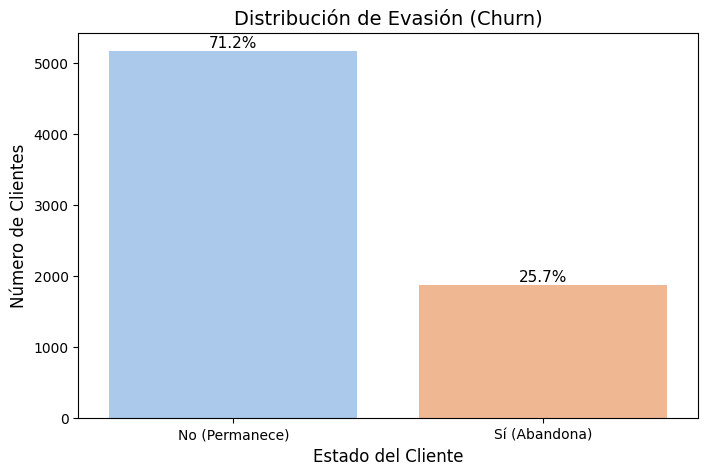

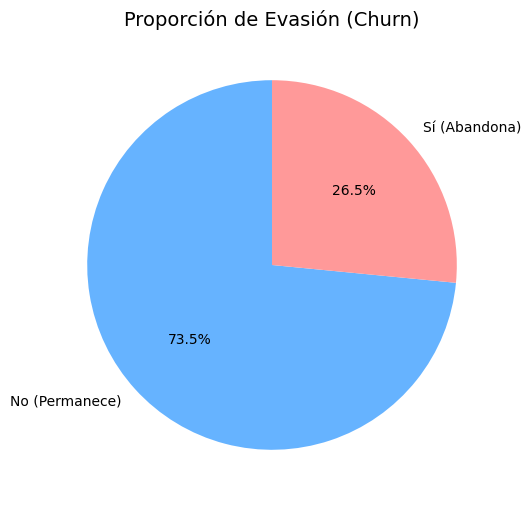

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuración inicial
sns.set_palette("pastel")

# 2. Proporción de Churn (valores binarios: 0=No, 1=Yes)
churn_distribution = datos_normalizado['Churn'].value_counts(normalize=True) * 100

# 3. Gráfico de Barras
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=datos_normalizado, x='Churn', hue='Churn',
                   hue_order=[0, 1], legend=False)
plt.title("Distribución de Evasión (Churn)", fontsize=14)
plt.xlabel("Estado del Cliente", fontsize=12)
plt.ylabel("Número de Clientes", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No (Permanece)', 'Sí (Abandona)'])

# Añadir porcentajes en las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 50,
            f'{height/datos_normalizado.shape[0]*100:.1f}%',
            ha='center', fontsize=11)

plt.show()

# 4. Gráfico de Pastel (opcional)
plt.figure(figsize=(6, 6))
plt.pie(churn_distribution,
        labels=['No (Permanece)', 'Sí (Abandona)'],
        autopct='%1.1f%%', startangle=90,
        colors=['#66b3ff', '#ff9999'])
plt.title("Proporción de Evasión (Churn)", fontsize=14)
plt.show()

#**6. Recuento de evasión por variables categóricas**

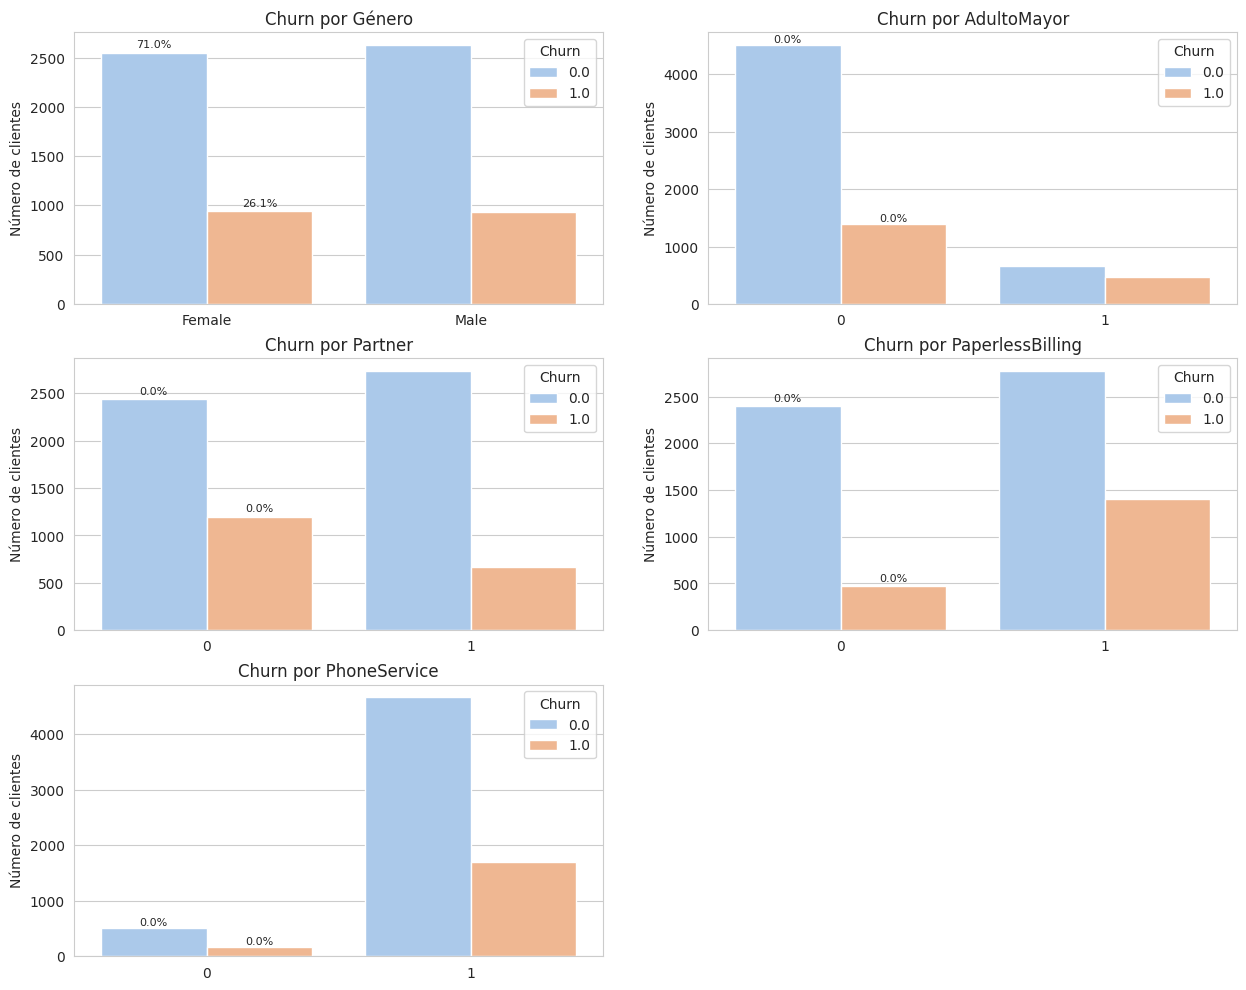

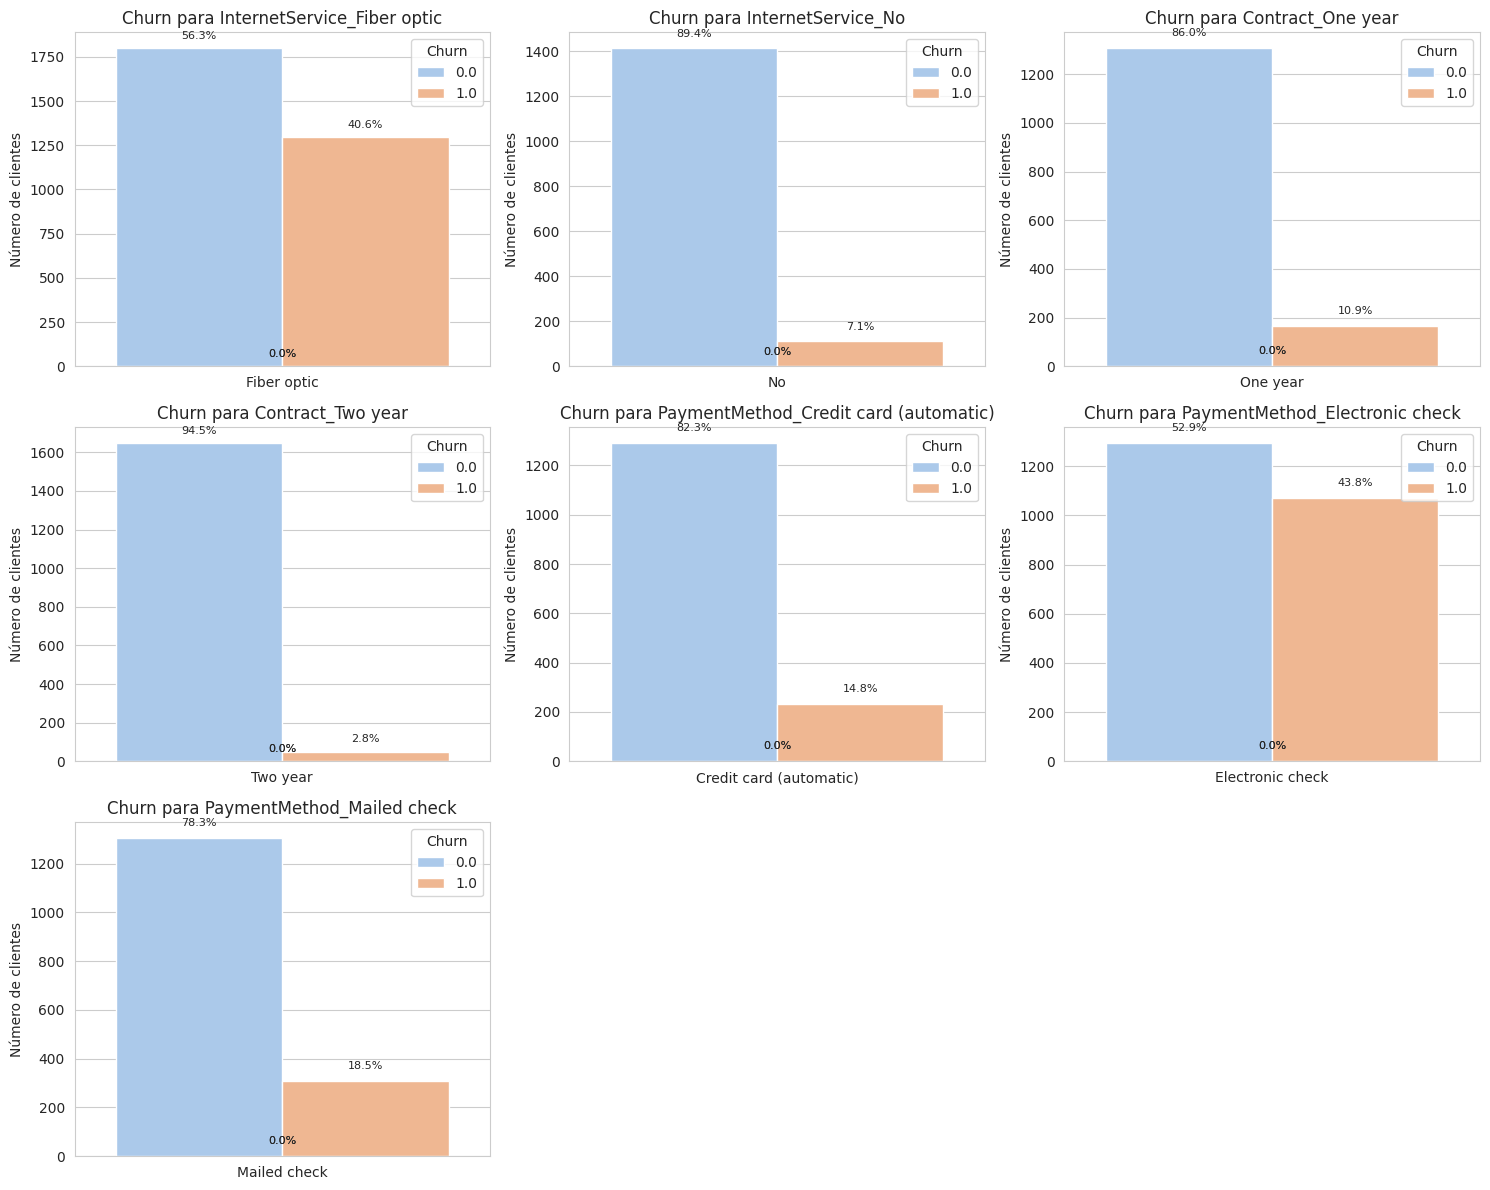

In [61]:
# Variables categóricas a analizar
categorical_vars = ['Género', 'AdultoMayor', 'Partner',
                    'PaperlessBilling', 'PhoneService'] # Updated categorical variables that were not one-hot encoded

# Configuración de gráficos
plt.figure(figsize=(15, 12))
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Loop para create stacked bar plots for original categorical variables
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i) # Adjusted subplot layout
    ax = sns.countplot(data=datos_normalizado, x=var, hue='Churn')
    plt.title(f'Churn por {var}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Número de clientes', fontsize=10)
    plt.xticks(rotation=0, ha='center') # Adjusted rotation for better readability

    # Añadir porcentajes en cada barra
    for p in ax.patches:
        height = p.get_height()
        # Get the x-coordinate of the bar
        x_coord = p.get_x()
        # Get the width of the bar
        width = p.get_width()

        # Determine the category name from the x-tick labels
        closest_x_label = None
        min_distance = float('inf')
        for tick_label in ax.get_xticklabels():
            tick_x = tick_label.get_position()[0]
            distance = abs((x_coord + width/2) - tick_x)
            if distance < min_distance:
                min_distance = distance
                closest_x_label = tick_label.get_text()

        # Determine the hue group (Churn 0 or 1) based on the bar's position within the category
        # Assuming two bars per category (for hue=0 and hue=1)
        # The first bar in each category group corresponds to the first hue value (0), the second to the second hue value (1)
        # This is a simplified approach and might need adjustment based on the exact plotting order
        # We can infer the hue group by comparing the patch's x-coordinate to the average x-coordinate for the category
        # This assumes the bars for different hues are placed side-by-side in a predictable order
        category_patches = [patch for patch in ax.patches if abs((patch.get_x() + patch.get_width()/2) - (x_coord + width/2)) < width]
        category_patches.sort(key=lambda patch: patch.get_x()) # Sort bars by x-position

        if len(category_patches) > 1:
             # Check if the current patch is the first or second in the sorted list for the category
             churn_group = 0 if p is category_patches[0] else 1
        else:
             # Handle cases with only one bar in a category (e.g., if a category has no churn or only churn)
             # In this case, we can look at the hue value directly if possible, or assume the only existing group
             try:
                 hue_value = p.get_facecolor()
                 churn_group = 0 if list(sns.color_palette("pastel")).index(hue_value) == 0 else 1
             except ValueError:
                  # Fallback if color matching still fails - assume the only group present
                  # This fallback might not be perfect but handles edge cases
                  if datos_normalizado[datos_normalizado[var] == closest_x_label]['Churn'].nunique() == 1:
                       churn_group = datos_normalizado[datos_normalizado[var] == closest_x_label]['Churn'].mode()[0]
                  else:
                       # If there are both churn and non-churn in the category but only one bar, something is unexpected
                       # We'll skip adding percentage for this bar to avoid further errors
                       continue


        # Calculate percentage based on the total count for each category
        total_count_category = datos_normalizado[datos_normalizado[var] == closest_x_label].shape[0]

        if total_count_category > 0:
             ax.text(x_coord + width/2., height + 50,
                    f'{height/total_count_category*100:.1f}%',
                    ha='center', fontsize=8)
        else:
             ax.text(x_coord + width/2., height + 50,
                    '0.0%',
                    ha='center', fontsize=8)


# Handle one-hot encoded categorical variables separately
one_hot_vars = ['InternetService_Fiber optic', 'InternetService_No',
                'Contract_One year', 'Contract_Two year',
                'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
                'PaymentMethod_Mailed check']

# We need to plot churn for each of these binary (0/1) columns
plt.figure(figsize=(15, 12))
for i, var in enumerate(one_hot_vars, 1):
    plt.subplot(3, 3, i)
    # For one-hot encoded columns, we plot the count where the value is 1, split by Churn
    ax = sns.countplot(data=datos_normalizado[datos_normalizado[var] == 1], x=var, hue='Churn')
    plt.title(f'Churn para {var}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Número de clientes', fontsize=10)
    plt.xticks(ticks=[0], labels=[var.replace('_', ' ').replace('InternetService ', '').replace('Contract ', '').replace('PaymentMethod ', '')]) # Clean up labels

    # Add percentages
    for p in ax.patches:
        height = p.get_height()
        # Calculate percentage based on the total count of customers with this specific service/contract/payment method
        total_count = datos_normalizado[datos_normalizado[var] == 1].shape[0]
        if total_count > 0:
             ax.text(p.get_x() + p.get_width()/2., height + 50,
                    f'{height/total_count*100:.1f}%',
                    ha='center', fontsize=8)
        else:
             ax.text(p.get_x() + p.get_width()/2., height + 50,
                    '0.0%',
                    ha='center', fontsize=8)


plt.tight_layout()
plt.show()

Heatmap de Correlación Categórica

/tmp/ipython-input-1226832198.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Month-to-month': datos_normalizado[datos_normalizado['Contract_One year'] == 0][datos_normalizado['Contract_Two year'] == 0]['Churn'].value_counts(),


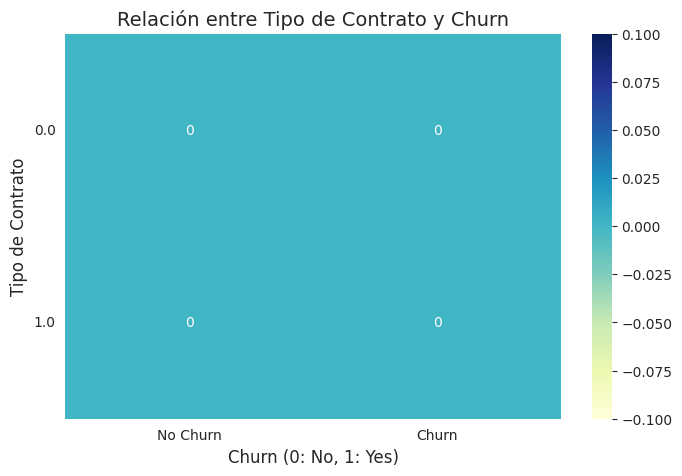

In [63]:
# Create contingency table for Churn and Contract types
# We can use the one-hot encoded columns to represent the contract types
contingency_table = pd.DataFrame({
    'Month-to-month': datos_normalizado[datos_normalizado['Contract_One year'] == 0][datos_normalizado['Contract_Two year'] == 0]['Churn'].value_counts(),
    'One year': datos_normalizado[datos_normalizado['Contract_One year'] == 1]['Churn'].value_counts(),
    'Two year': datos_normalizado[datos_normalizado['Contract_Two year'] == 1]['Churn'].value_counts()
}).T # Transpose to have contract types as rows

# Fill potential NaN values with 0 if a contract type has no churn/non-churn
contingency_table = contingency_table.fillna(0)

# Ensure consistent index (Churn 0 and 1)
contingency_table = contingency_table.reindex([0.0, 1.0], fill_value=0)


# Heatmap of the contingency table
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Relación entre Tipo de Contrato y Churn", fontsize=14)
plt.xlabel("Churn (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Tipo de Contrato", fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn']) # Adjust x-tick labels
plt.yticks(rotation=0) # Keep y-tick labels horizontal
plt.show()

#**7. Conteo de evasión por variables numéricas**

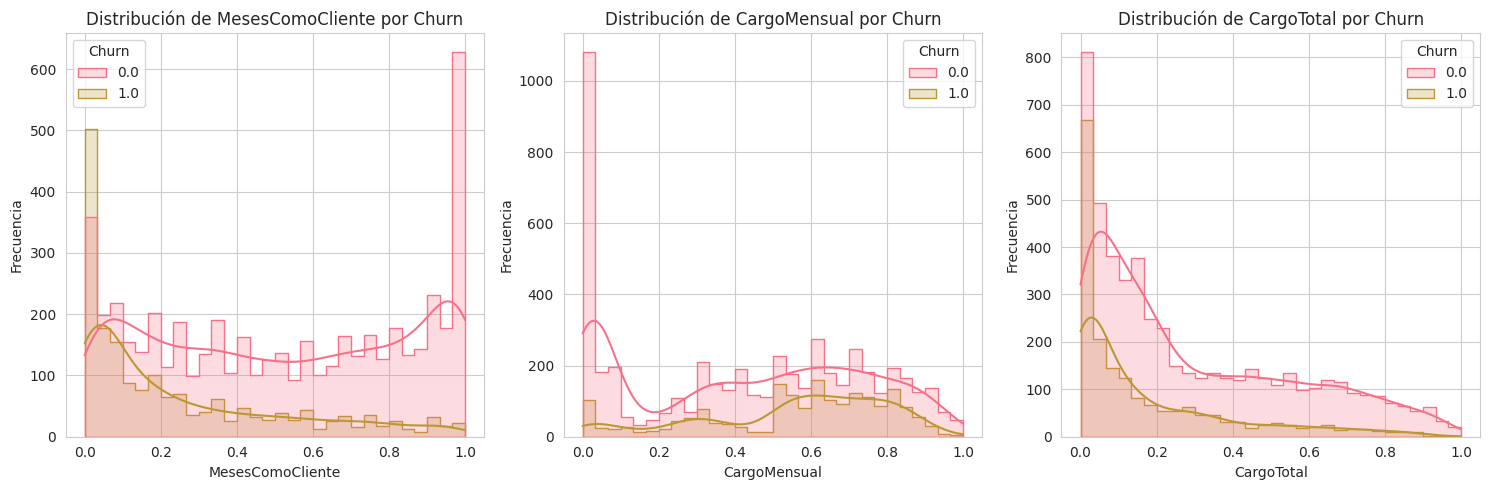

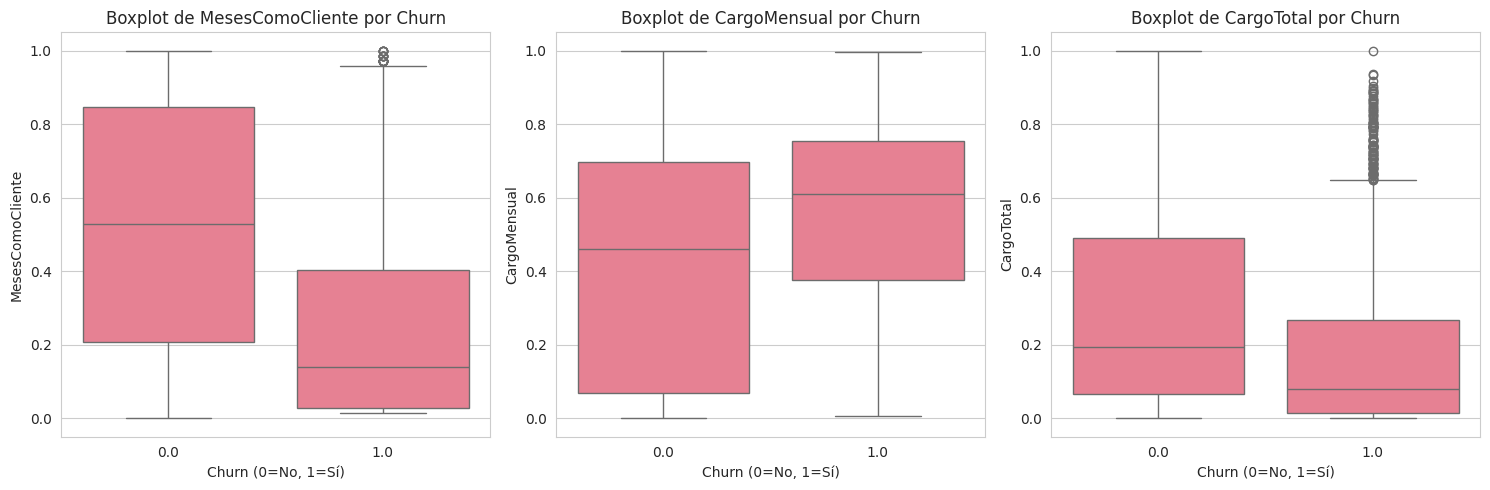

=== Estadísticas por Grupo (Churn) ===
      MesesComoCliente                                          CargoMensual  \
                 count  mean   std   min   25%   50%   75%  max        count   
Churn                                                                          
0.0             5174.0  0.52  0.33  0.00  0.21  0.53  0.85  1.0       5174.0   
1.0             1869.0  0.25  0.27  0.01  0.03  0.14  0.40  1.0       1869.0   

             ...            CargoTotal                                          
       mean  ...   75%  max      count  mean   std  min   25%   50%   75%  max  
Churn        ...                                                                
0.0    0.43  ...  0.70  1.0     5174.0  0.29  0.27  0.0  0.07  0.19  0.49  1.0  
1.0    0.56  ...  0.76  1.0     1869.0  0.18  0.22  0.0  0.02  0.08  0.27  1.0  

[2 rows x 24 columns]


In [65]:
# Configuración de estilos
# plt.style.use('seaborn') # Removed the problematic line
sns.set_palette("husl")

# Variables numéricas a analizar
numeric_vars = ['MesesComoCliente', 'CargoMensual', 'CargoTotal']

# 1. Histogramas comparativos
plt.figure(figsize=(15, 5))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=datos_normalizado, x=var, hue='Churn', kde=True, bins=30, element='step')
    plt.title(f'Distribución de {var} por Churn', fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# 2. Boxplots (para identificar outliers y diferencias)
plt.figure(figsize=(15, 5))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=datos_normalizado, x='Churn', y=var)
    plt.title(f'Boxplot de {var} por Churn', fontsize=12)
    plt.xlabel('Churn (0=No, 1=Sí)')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

# 3. Estadísticas descriptivas agrupadas por Churn
stats_by_churn = datos_normalizado.groupby('Churn')[numeric_vars].describe().round(2)
print("=== Estadísticas por Grupo (Churn) ===")
print(stats_by_churn)

#**8. Informe final**

# Informe Final: Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción
**Objetivo**: Identificar factores que influyen en el abandono de clientes (Churn) para proponer estrategias de retención.  
**Problema**: El 27% de los clientes abandona, impactando negativamente en los ingresos.  

## 🔹 Limpieza y Tratamiento de Datos
1. **Carga y limpieza**:
   - Eliminación de duplicados y reemplazo de NaN en `Charges.Total` por 0.
2. **Transformación**:
   - Variables binarias (`Yes=1`, `No=0`).
   - One-Hot Encoding para `PaymentMethod` y `Contract`.
3. **Nueva variable**:
   - `Cuentas_Diarias = Charges.Monthly / 30`.

## 🔹 Análisis Exploratorio (EDA)
### 1. Distribución de Churn
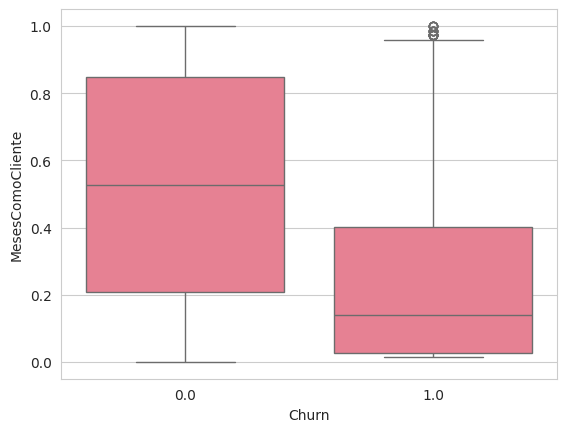  
- **27% de abandono** (1 de cada 4 clientes).

### 2. Churn por Variables Categóricas
```python
sns.countplot(data=datos, x='Contract', hue='Churn')

<Axes: xlabel='Churn', ylabel='MesesComoCliente'>

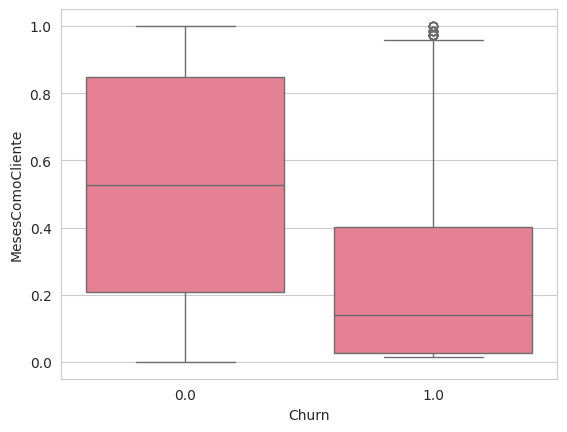

In [67]:
sns.boxplot(data=datos, x='Churn', y='tenure')

#¡Extra! Análisis de correlación entre variables

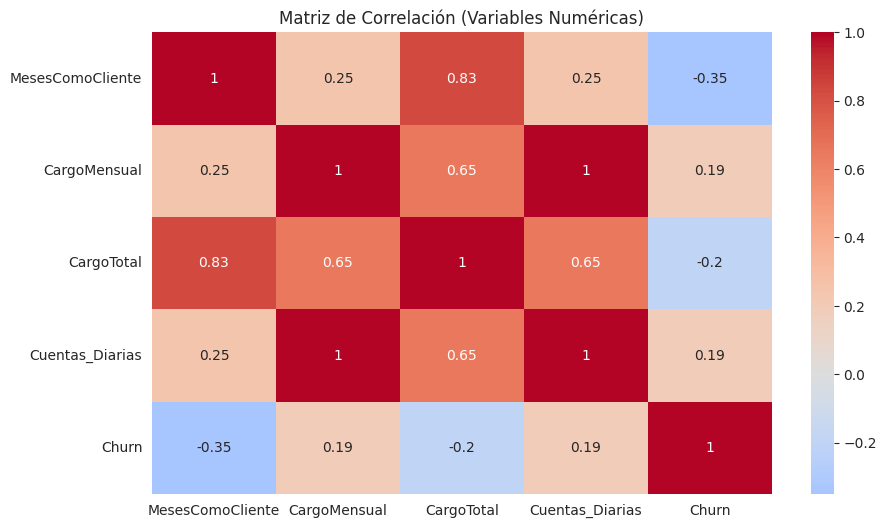

In [69]:
# Seleccionar variables numéricas
numeric_vars = ['MesesComoCliente', 'CargoMensual', 'CargoTotal', 'Cuentas_Diarias', 'Churn']

# Calcular matriz de correlación
corr_matrix = datos_normalizado[numeric_vars].corr().round(2)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación (Variables Numéricas)")
plt.show()

Correlación entre Variables Específicas
A. Relación: Cuentas_Diarias vs Churn

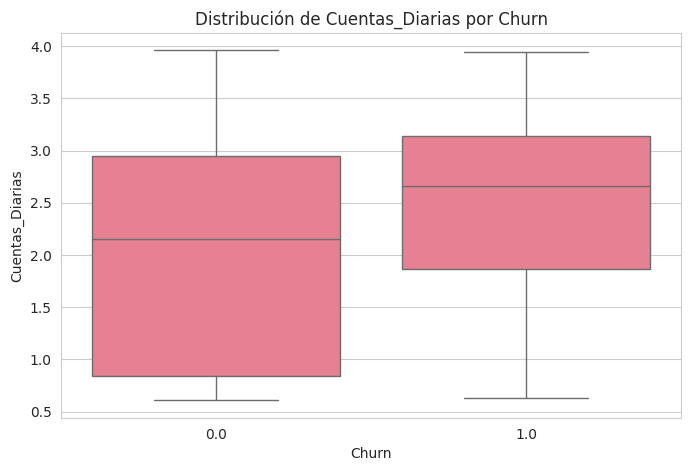

In [70]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_normalizado, x='Churn', y='Cuentas_Diarias')
plt.title("Distribución de Cuentas_Diarias por Churn")
plt.show()

B. Relación: Número de Servicios vs Churn

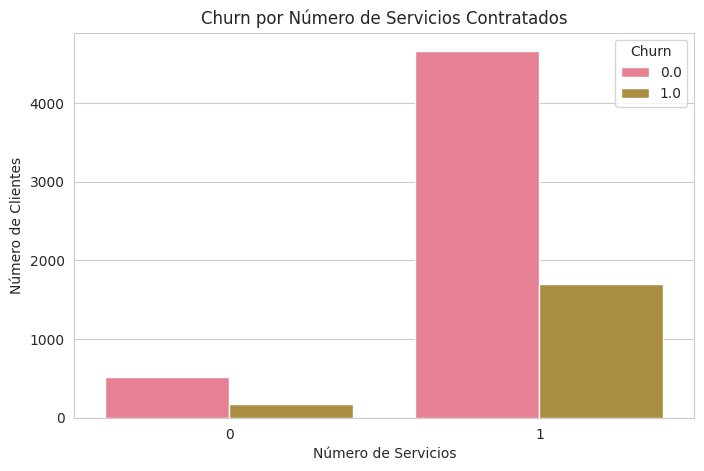

In [72]:
# Create variable "Total_Servicios" by summing relevant service columns
# Use the binary 'PhoneService' and the 'Yes' columns from one-hot encoded services
servicios_columns = ['PhoneService', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
                     'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
                     'StreamingMovies_Yes']

# Check if these columns exist in the dataframe before summing
existing_service_columns = [col for col in servicios_columns if col in datos_normalizado.columns]

if existing_service_columns:
    datos_normalizado['Total_Servicios'] = datos_normalizado[existing_service_columns].sum(axis=1)
else:
    print("None of the specified service columns exist in the DataFrame.")
    datos_normalizado['Total_Servicios'] = 0 # Create column with 0 if no service columns found


# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(data=datos_normalizado, x='Total_Servicios', hue='Churn')
plt.title("Churn por Número de Servicios Contratados")
plt.xlabel("Número de Servicios")
plt.ylabel("Número de Clientes")
plt.show()

Visualización Adicional (Gráfico de Dispersión)

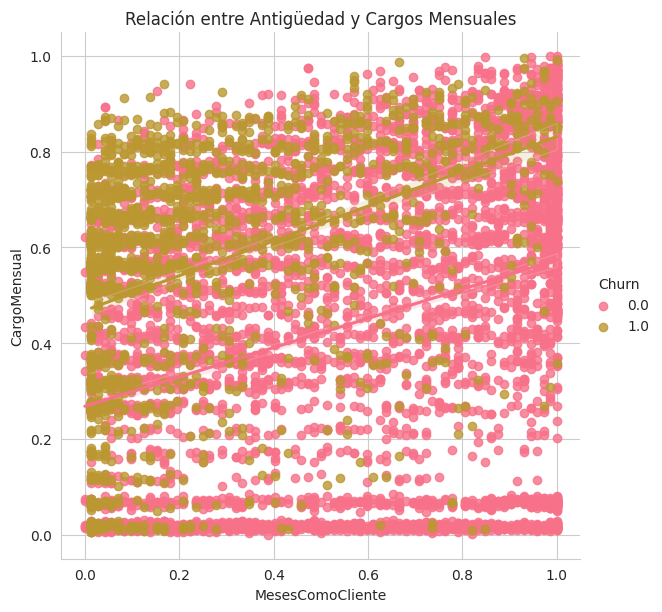

In [74]:
sns.lmplot(data=datos_normalizado, x='MesesComoCliente', y='CargoMensual', hue='Churn', height=6)
plt.title("Relación entre Antigüedad y Cargos Mensuales")
plt.show()